<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_2_%D0%97%D0%B0%D0%B2%D0%B4_1_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# Завантаження даних з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

df = pd.read_html(url, header=0)[2]
#1. Вивести перших 5 рядків.
df.head(5)

,Country/Territory,IMF[1][13],IMF[1][13].1,World Bank[14],World Bank[14].1,United Nations[15],United Nations[15].1
0,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
1,World,109529216,2024,105435540,2023,100834796,2022
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022


In [ ]:
#2. Визначити розмір датасета.
df.shape

(211, 7)

In [ ]:
#3. Визначити оптимальну кількість стовпців.
df.columns

Index(['Country/Territory', 'IMF[1][13]', 'IMF[1][13].1', 'World Bank[14]',
       'World Bank[14].1', 'United Nations[15]', 'United Nations[15].1'],
      dtype='object')

In [ ]:
#4. Видаляємо зайві колонки"
df = df.drop(df.columns[[2, 4, 6]], axis=1)
df = df.drop(0)
df.head(6)


,Country/Territory,IMF[1][13],World Bank[14],United Nations[15]
1,World,109529216,105435540,100834796
2,United States,28781083,27360935,25744100
3,China,18532633,17794782,17963170
4,Germany,4591100,4456081,4076923
5,Japan,4110452,4212945,4232173
6,India,3937011,3549919,3465541


In [ ]:
#4. Змінюємо назви стовпців на більш зручні
df.columns = ['Country', 'IMF_2024', 'WorldBank_2023', 'UN_2022']
df.head(6)

,Country,IMF_2024,WorldBank_2023,UN_2022
1,World,109529216,105435540,100834796
2,United States,28781083,27360935,25744100
3,China,18532633,17794782,17963170
4,Germany,4591100,4456081,4076923
5,Japan,4110452,4212945,4232173
6,India,3937011,3549919,3465541


In [ ]:
#5. Визначити тип даних.
df.dtypes

,0
Country,object
IMF_2024,object
WorldBank_2023,object
UN_2022,object


In [ ]:
#6.Заміна значень "—" на NaN
df.replace("—", np.nan, inplace=True)
# Перевіряємо наявність пропущених значень
df.isnull().sum()

,0
Country,0
IMF_2024,15
WorldBank_2023,8
UN_2022,1


In [ ]:
# Переведемо стовпці у float
def to_numeric_if_possible(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value

# Перетворення стовпців з типом даних object на числові, якщо можливо
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(to_numeric_if_possible)

# Перевірка результату
print(df.dtypes)

Country            object
IMF_2024          float64
WorldBank_2023    float64
UN_2022           float64
dtype: object


In [ ]:
#Замінюємо пропущені значення на середнє значення.
#Виключаємо науковий формат чисел в Pandas
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
df.fillna(df.mean(numeric_only=True))
#7. Ще раз перевіряємо наявність пропущених значень
print(df.isnull().sum())
df.head(23)

Country            0
IMF_2024          15
WorldBank_2023     8
UN_2022            1
dtype: int64


,Country,IMF_2024,WorldBank_2023,UN_2022
1,World,"109,529,216","105,435,540","100,834,796"
2,United States,"28,781,083","27,360,935","25,744,100"
3,China,"18,532,633","17,794,782","17,963,170"
4,Germany,"4,591,100","4,456,081","4,076,923"
5,Japan,"4,110,452","4,212,945","4,232,173"
6,India,"3,937,011","3,549,919","3,465,541"
7,United Kingdom,"3,495,261","3,340,032","3,089,072"
8,France,"3,130,014","3,030,904","2,775,316"
9,Brazil,"2,331,391","2,173,666","1,920,095"
10,Italy,"2,328,028","2,254,851","2,046,952"


In [ ]:
#8. Перевірка наявності дублікатів
df.duplicated().sum()

0

In [ ]:
#9. Описова статистика
print("Описова статистика:")
print(df.describe())

Описова статистика:
         IMF_2024  WorldBank_2023     UN_2022
count         195             202         209
mean    1,123,228       1,037,206     961,270
std     8,200,460       7,751,885   7,293,077
min            66              62          59
25%        13,276           9,284       8,772
50%        46,790          37,573      31,717
75%       297,844         259,432     237,101
max   109,529,216     105,435,540 100,834,796


In [ ]:
#10. Визначте відхилення (різницю) між показниками MVF_2024 та
#WorldBank_2023 для кожної країни. У яких країнах ці показники
#найбільше відрізняються (дати відповідь)?
# Видалення першого рядка (індекс 0)
df = df.iloc[1:].reset_index(drop=True)

# Обчислення відхилення між показниками MVF_2024 та WorldBank_2023
df['Deviation_IMF_WB'] = df['IMF_2024'] - df['WorldBank_2023']

# Країна з найбільшим відхиленням
max_deviation = df['Deviation_IMF_WB'].abs().idxmax()
print("Країна з найбільшим відхиленням:", df.loc[max_deviation, 'Country'])

Країна з найбільшим відхиленням: United States


In [ ]:
#11. Кореляція між показниками
correlation_matrix = df[['IMF_2024', 'WorldBank_2023', 'UN_2022']].corr()

# Виведення матриці кореляцій
print(correlation_matrix)

                IMF_2024  WorldBank_2023  UN_2022
IMF_2024               1               1        1
WorldBank_2023         1               1        1
UN_2022                1               1        1


In [ ]:
#12. Обчислення середнього значення для кожного стовпця (IMF_2024,
#WorldBank_2023, UN_2022)
mean_values = df[['IMF_2024', 'WorldBank_2023', 'UN_2022']].mean()
print("Середнє значення для кожного року:")
print(mean_values)

Середнє значення для кожного року:
IMF_2024         564,434
WorldBank_2023   517,811
UN_2022          481,109
dtype: float64


In [ ]:
#13. Обчисліть стандартне відхилення показників для кожної країни.
df['Std_Deviation'] = df[['IMF_2024', 'WorldBank_2023', 'UN_2022']].std(axis=1)

# Країна з найвищою варіативністю
max_variability = df['Std_Deviation'].idxmax()
print("Країна з найвищою варіативністю:", df.loc[max_variability, 'Country'])

Країна з найвищою варіативністю: United States


In [ ]:
#14. Найвищий і найнижчий показники в кожному році
max_imf_country = df.loc[df['IMF_2024'].idxmax(), 'Country']
max_wb_country = df.loc[df['WorldBank_2023'].idxmax(), 'Country']
max_un_country = df.loc[df['UN_2022'].idxmax(), 'Country']

# Знаходимо країну з найнижчим показником для кожного стовпця
min_imf_country = df.loc[df['IMF_2024'].idxmin(), 'Country']
min_wb_country = df.loc[df['WorldBank_2023'].idxmin(), 'Country']
min_un_country = df.loc[df['UN_2022'].idxmin(), 'Country']

# Виводимо результати
print(f"Країна з найвищим показником IMF_2024: {max_imf_country}")
print(f"Країна з найнижчим показником IMF_2024: {min_imf_country}")
print(f"Країна з найвищим показником WorldBank_2023: {max_wb_country}")
print(f"Країна з найнижчим показником WorldBank_2023: {min_wb_country}")
print(f"Країна з найвищим показником UN_2022: {max_un_country}")
print(f"Країна з найнижчим показником UN_2022: {min_un_country}")

Країна з найвищим показником IMF_2024: United States
Країна з найнижчим показником IMF_2024: Tuvalu
Країна з найвищим показником WorldBank_2023: United States
Країна з найнижчим показником WorldBank_2023: Tuvalu
Країна з найвищим показником UN_2022: United States
Країна з найнижчим показником UN_2022: Tuvalu


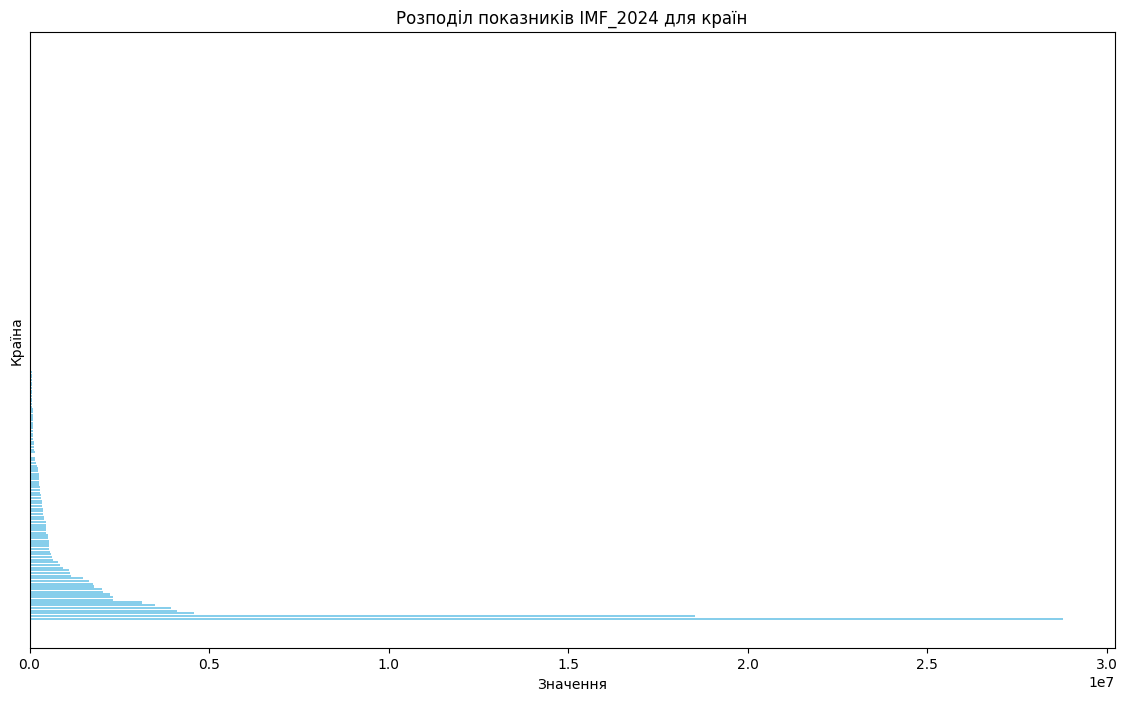

In [ ]:
import matplotlib.pyplot as plt

# Вибір стовпця для гістограми (MVF_2024)
column = 'IMF_2024'

# Побудова гістограми
plt.figure(figsize=(14, 8))  # Налаштування розміру фігури
plt.barh(df['Country'], df[column], color='skyblue')  # Побудова горизонтальної гістограми

# Додавання заголовка та підписів осей
plt.title(f'Розподіл показників {column} для країн')
plt.xlabel('Значення')
plt.ylabel('Країна')

# Приховування всіх осей Y
plt.yticks([])

# Показати гістограму
plt.show()


In [ ]:
# Обчислюємо загальну частку для кожного стовпця
total_imf = df['IMF_2024'].sum()
total_wb = df['WorldBank_2023'].sum()
total_un = df['UN_2022'].sum()
# Обчислюємо частку кожної країни відносно загальної частки
df['IMF_2024_share'] = df['IMF_2024'] / total_imf
df['WorldBank_2023_share'] = df['WorldBank_2023'] / total_wb
df['UN_2022_share'] = df['UN_2022'] / total_un

# Виводимо результат
print(df[['Country', 'IMF_2024_share', 'WorldBank_2023_share', 'UN_2022_share']])


              Country  IMF_2024_share  WorldBank_2023_share  UN_2022_share
0       United States               0                     0              0
1               China               0                     0              0
2             Germany               0                     0              0
3               Japan               0                     0              0
4               India               0                     0              0
..                ...             ...                   ...            ...
204          Kiribati               0                     0              0
205             Palau               0                     0              0
206  Marshall Islands               0                     0              0
207             Nauru               0                     0              0
208            Tuvalu               0                     0              0

[209 rows x 4 columns]


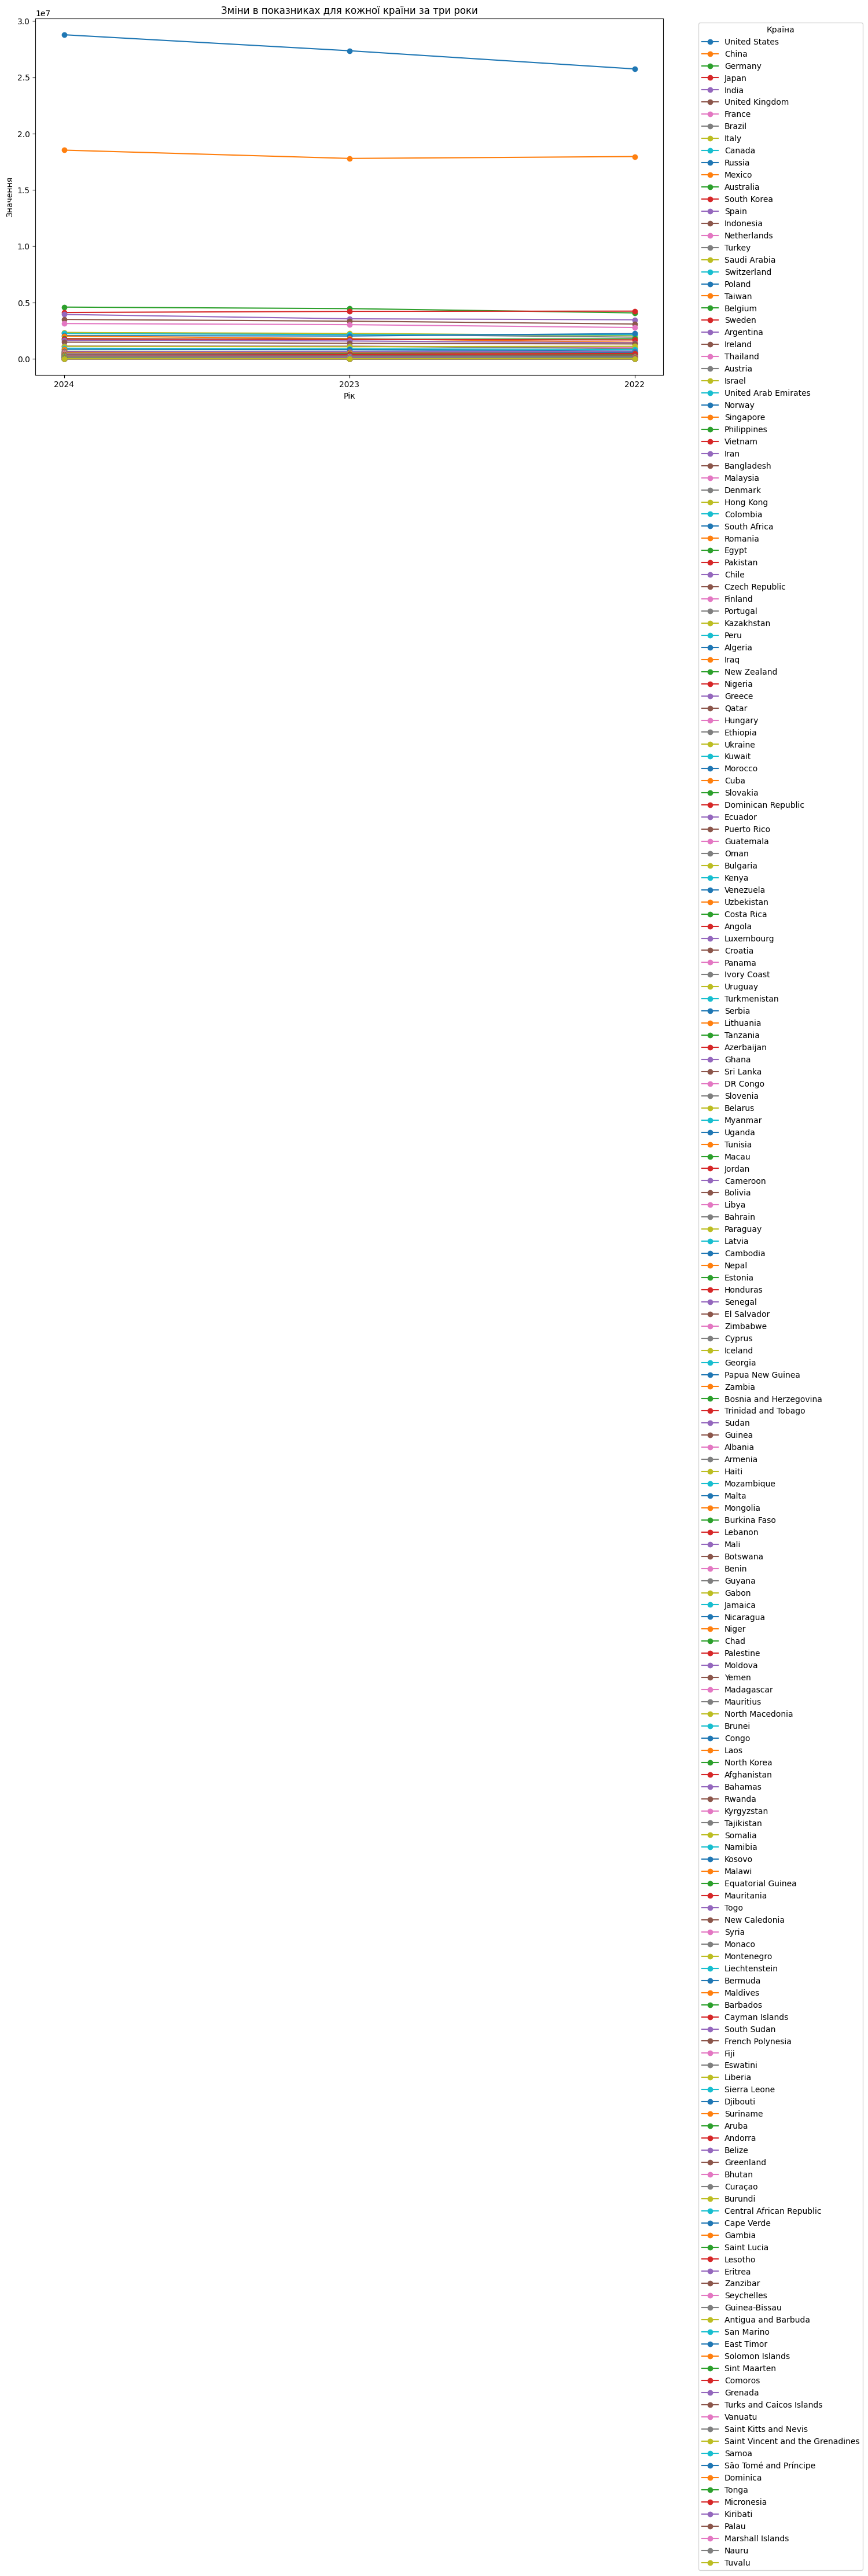

In [ ]:
import matplotlib.pyplot as plt

# Налаштування розміру фігури
plt.figure(figsize=(14, 8))

# Побудова лінійних графіків для кожної країни
for country in df['Country']:
    # Вибір рядка для поточної країни
    country_data = df[df['Country'] == country]

    # Створення списків для осі X (роки) і осі Y (значення)
    years = ['2024', '2023', '2022']
    values = [country_data['IMF_2024'].values[0], country_data['WorldBank_2023'].values[0], country_data['UN_2022'].values[0]]

    # Побудова лінійного графіка для поточної країни
    plt.plot(years, values, marker='o', label=country)

# Додавання заголовка та підписів осей
plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.legend(title='Країна', bbox_to_anchor=(1.05, 1), loc='upper left')

# Відображення графіка
plt.show()
